### **Demo - Performance Measurements in Python**

In this demo, you will use performance measurements like ROC, SMOTE to evaluate the model using scikit-learn library.

Problem Statement

The dataset contain details of users like User ID, Gender, Age, EstimatedSalary and Purchased. The data shows whether a person is likely to purchase the artefacts advertised or not. Based on the data we have to generate a model that can predict whether the person will make a purchase or not

### **1. Import required Libraries**

In [1]:
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\divu2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
import seaborn as sns

### **2. Load the Dataset**

In [4]:
#Importing the dataset using pandas
ad_data=pd.read_csv('Social_Network_Ads.csv')
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### **3. Data Analysis**

In [5]:
#Dataset shape to get number of rows and columns
ad_data.shape

(400, 5)

### **4. Checking Null values**

In [6]:
#Checking for null values
ad_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

None of the columns contain null values so there is no need to remove/replace data

### **5. Is Data Balanced?**


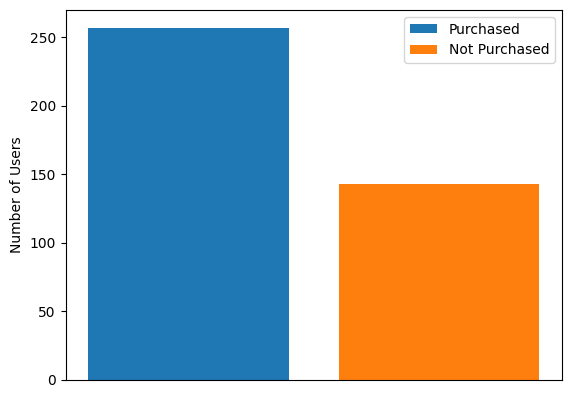

In [7]:
purchased=ad_data[ad_data.Purchased==0].Purchased.count()
not_purchased=ad_data[ad_data.Purchased==1].Purchased.count()
plt.bar(0,purchased,label='Purchased')
plt.bar(1,not_purchased,label='Not Purchased')
plt.xticks([])
plt.ylabel('Number of Users')
plt.legend()
plt.show()

Data is clearly imbalanced

### **6. Splitting independent and dependent variables**

In [9]:
# Eliminating user id and gender as they would not have any impect

x = ad_data[['Age','EstimatedSalary']]
y = ad_data['Purchased']

In [10]:
# Feature Scaling

sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.20)

### **7. SMOTE**


In [15]:
#Over sampling the dataset

smt=SMOTE()
ox_train, oy_train = smt.fit_resample(x_train, y_train)

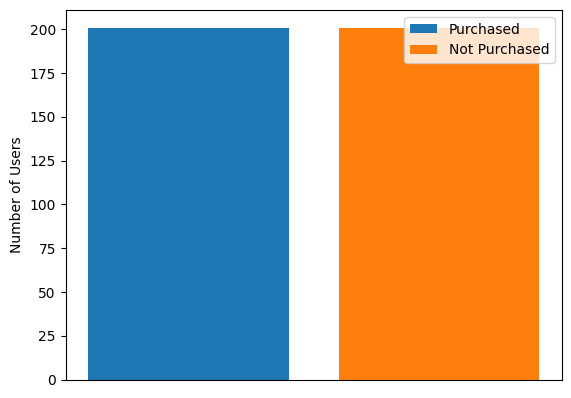

In [17]:
# Checking newly oversampled data
_, counts=np.unique(oy_train,return_counts=True)

purchased=counts[0]
notpurchased=counts[1]

plt.bar(0,purchased,label='Purchased')
plt.bar(1,notpurchased,label='Not Purchased')
plt.xticks([])
plt.ylabel('Number of Users')
plt.legend()
plt.show()

### **8. Training the model**
#### **Logistic Regression**

In [18]:
logreg=LogisticRegression(C=1,solver='liblinear',multi_class='ovr')
logreg.fit(ox_train, oy_train)

C:\Users\divu2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

#### **Decision Tree**

In [19]:
d_tree=DecisionTreeClassifier(criterion='entropy',splitter='best')
d_tree.fit(ox_train, oy_train)

DecisionTreeClassifier(criterion='entropy')

### **9. Confusion Matrix**
#### **Logistic Regression**

In [20]:
l_pred=logreg.predict(x_test)
cnf_matrix=confusion_matrix(y_test, l_pred)

Text(0.5, 23.52222222222222, 'Predicted Label')

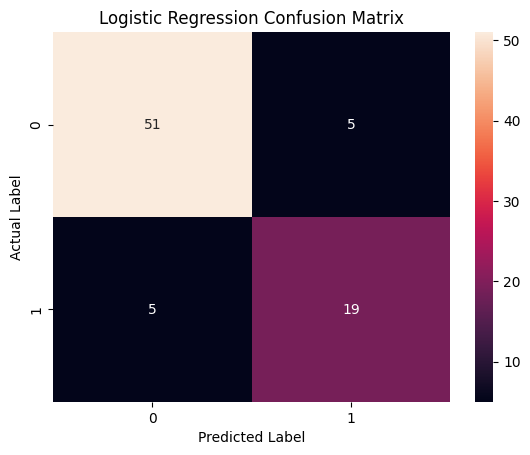

In [21]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [22]:
print("Accuracy:",metrics.accuracy_score(y_test,l_pred))
print("Precision:",metrics.precision_score(y_test,l_pred))
print("Recall:",metrics.recall_score(y_test,l_pred))

Accuracy: 0.875
Precision: 0.7916666666666666
Recall: 0.7916666666666666


#### **Decision Tree**

In [23]:
d_pred=d_tree.predict(x_test)
cnf_matrix=confusion_matrix(y_test, d_pred)

Text(0.5, 23.52222222222222, 'Predicted Label')

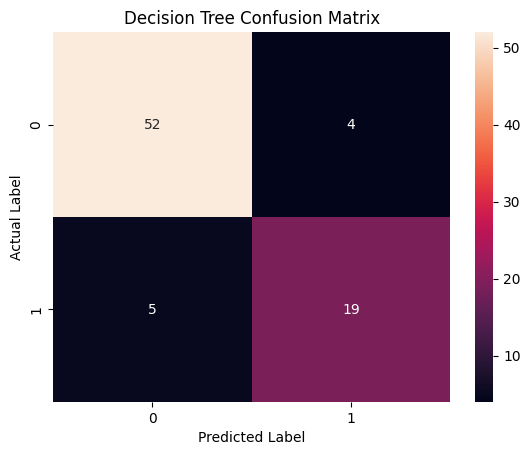

In [24]:
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test,d_pred))
print("Precision:",metrics.precision_score(y_test,d_pred))
print("Recall:",metrics.recall_score(y_test,d_pred))

Accuracy: 0.8875
Precision: 0.8260869565217391
Recall: 0.7916666666666666


### **10. ROC Curve**

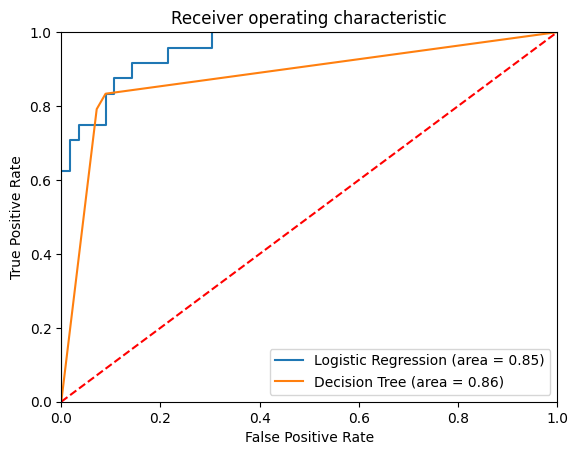

In [27]:
plt.figure()
#For logistic regression
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(x_test))
lfpr, ltpr, lthresholds = metrics.roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.plot(lfpr, ltpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#For Decision Tree
decision_roc_auc = metrics.roc_auc_score(y_test, d_tree.predict(x_test))
dfpr, dtpr, lthresholds = metrics.roc_curve(y_test, d_tree.predict_proba(x_test)[:,1])
plt.plot(dfpr, dtpr, label='Decision Tree (area = %0.2f)' % decision_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
